In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from ucimlrepo import fetch_ucirepo 

In [100]:
seed = 40 # Setting a random seed for deterministic use

In [101]:
# Fetching the DataFrame
automobile = fetch_ucirepo(id=10) 
X_df : pd.DataFrame = automobile.data.features 
y_df : pd.DataFrame = automobile.data.targets 
X_df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [102]:
numeric_cols = X_df.select_dtypes(include=['number']).columns # Getting the columns that are numeric

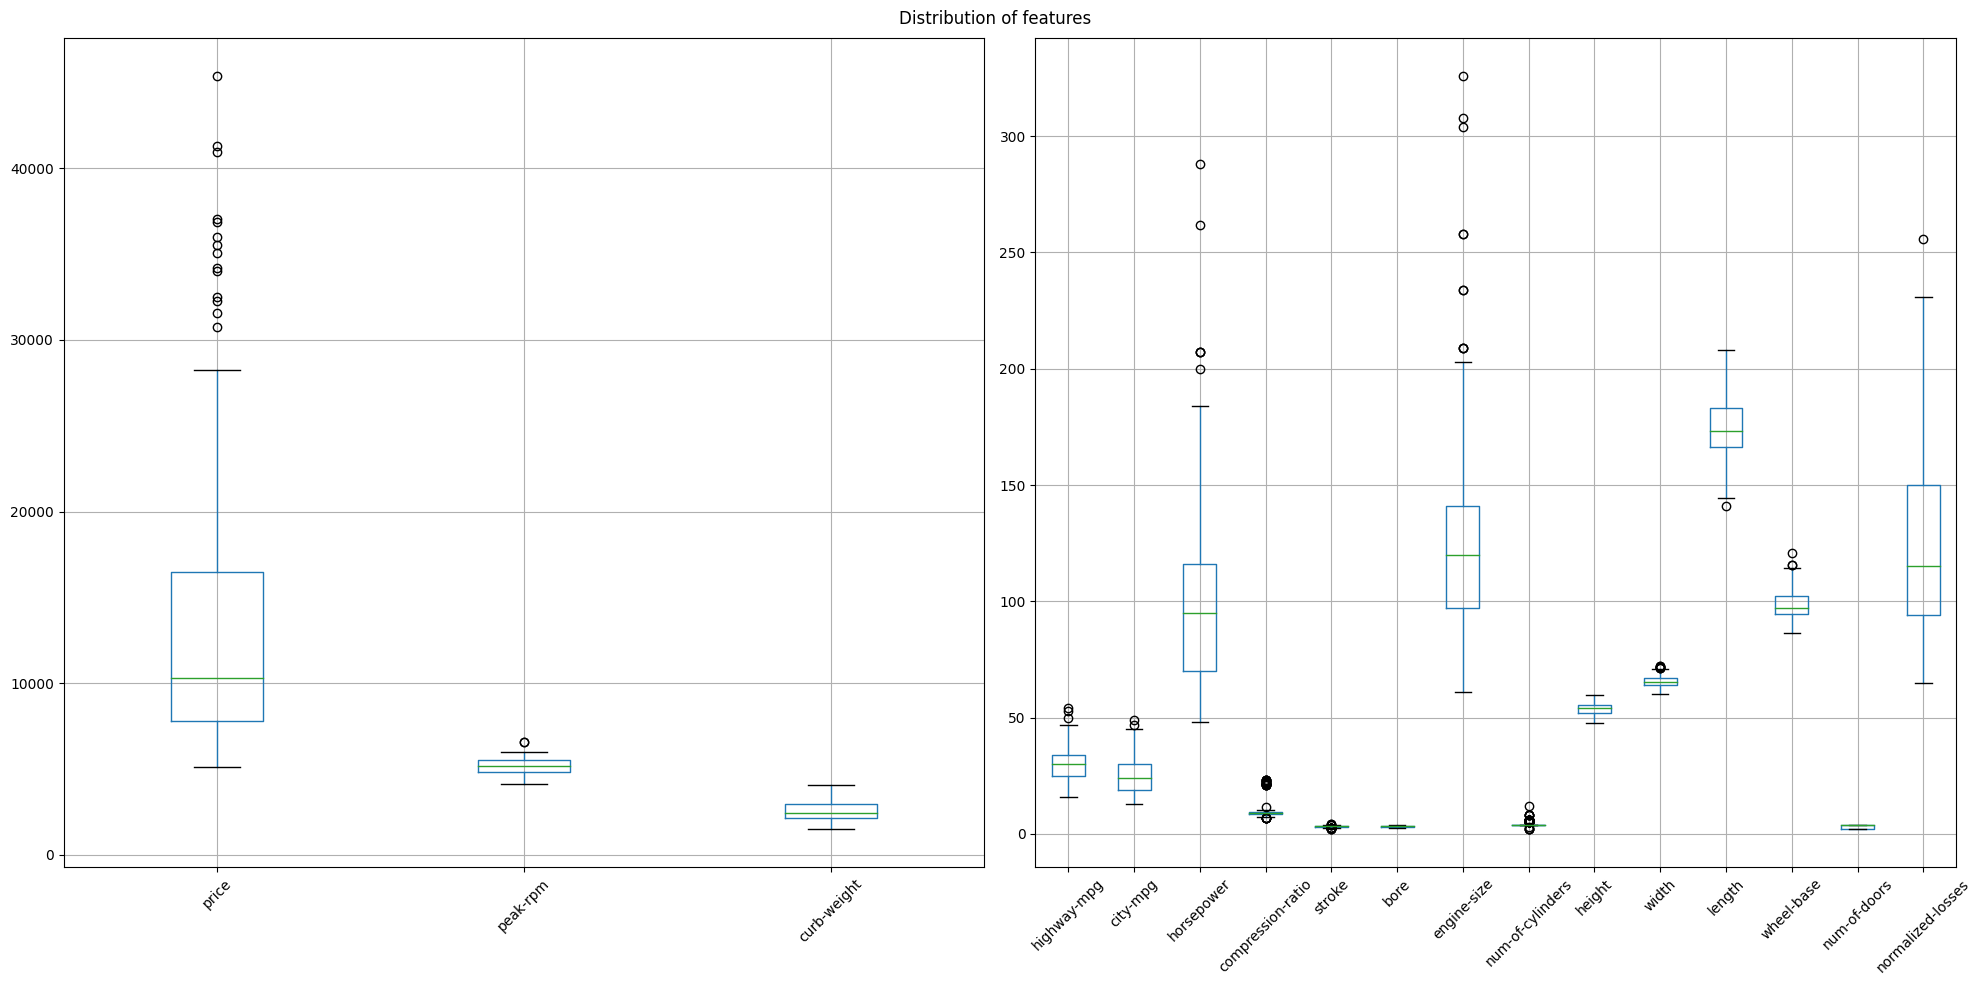

In [103]:
# Plotting the distribution of the numeric columns with boxplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
cols_on_first = ['price', 'peak-rpm', 'curb-weight']
X_df[cols_on_first].boxplot(ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
cols_on_second = [col for col in numeric_cols if col not in cols_on_first]
X_df[cols_on_second].boxplot(ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
fig.suptitle('Distribution of features')
plt.tight_layout()
plt.show()
# The different features are in different ranges, that means standardizing should be better than normalizing

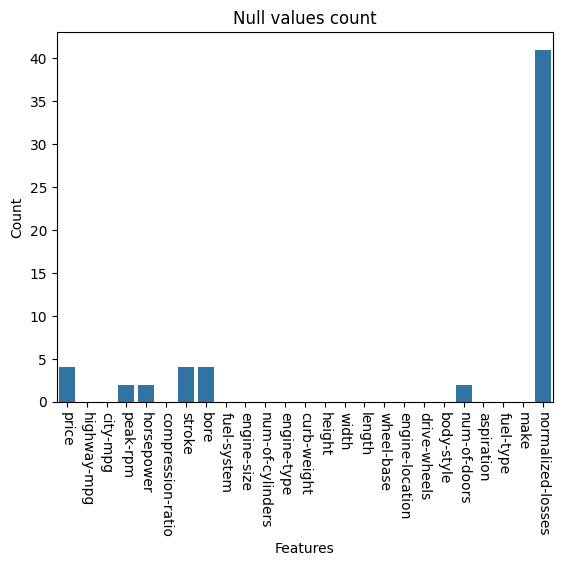

In [104]:
# Checking how many missing values are in the dataframe
null_df = X_df.isnull().sum()
sns.barplot(X_df.isnull().sum())
plt.xticks(rotation=-90)
plt.title('Null values count')
plt.ylabel('Count')
plt.xlabel('Features')
plt.show()

In [105]:
# No missing values in the target dataframe
y_df.isnull().sum()

symboling    0
dtype: int64

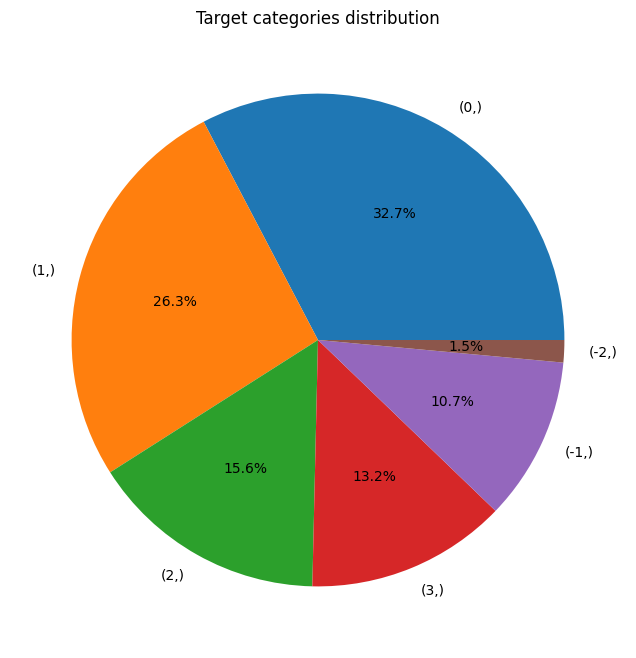

In [106]:
# Plotting the distribution of the target classes
plt.figure(figsize=(10,8))
y_df.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Target categories distribution')
plt.show()
# The classes are imbalanced, that means more metrics should be used during evaluation

In [107]:
X_df.ffill().isnull().sum()
# With forward fill there would be still some missing values

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    3
dtype: int64

In [108]:
X_df.bfill().isnull().sum()
# With the back fill there are no more missing values

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64

In [109]:
X_df = X_df.bfill()

In [110]:
X_df.duplicated().sum()
# No duplicated rows

0

In [111]:
# Getting the categorical columns
category_cols = X_df.select_dtypes(include=['object']).columns
category_cols

Index(['fuel-system', 'engine-type', 'engine-location', 'drive-wheels',
       'body-style', 'aspiration', 'fuel-type', 'make'],
      dtype='object')

In [112]:
# Encoding the categorical labels with LabelEncoder (Result will be 1, 2, 3....)
label_encoder = LabelEncoder()
for col in category_cols:
    X_df[col] = label_encoder.fit_transform(X_df[col])

In [113]:
X_df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,164.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,164.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,171.2,94.5,0,2,2,2.0,0,1,0,164.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,176.6,99.8,0,1,3,4.0,0,1,1,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,176.6,99.4,0,0,3,4.0,0,1,1,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,1,1,21,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,5,173,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,3,145,...,188.8,109.1,0,2,3,4.0,1,0,21,95.0


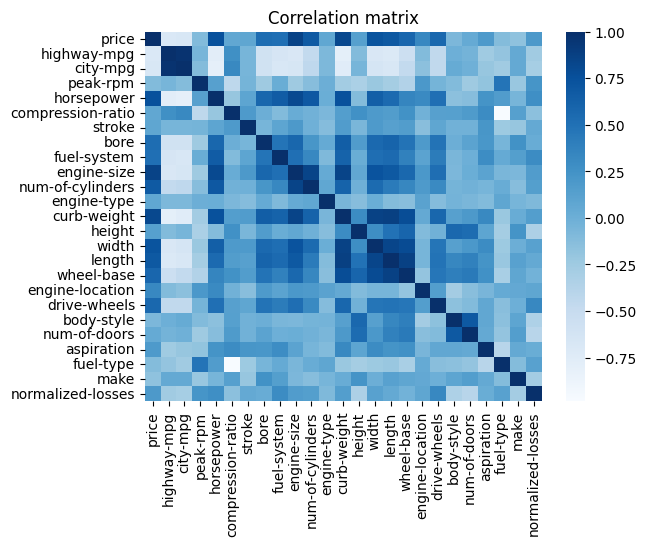

In [114]:
# Plotting the correlation matrix, it can be seen that there are some features with high correlation
sns.heatmap(X_df.corr(), cmap='Blues')
plt.title('Correlation matrix')
plt.show()

In [115]:
# Calculating the features' variances
variances = X_df.var()
variances

price                6.208856e+07
highway-mpg          4.742310e+01
city-mpg             4.279962e+01
peak-rpm             2.276599e+05
horsepower           1.562088e+03
compression-ratio    1.577710e+01
stroke               9.869127e-02
bore                 7.342610e-02
fuel-system          4.052989e+00
engine-size          1.734114e+03
num-of-cylinders     1.168245e+00
engine-type          1.112530e+00
curb-weight          2.711079e+05
height               5.970800e+00
width                4.601900e+00
length               1.522087e+02
wheel-base           3.626178e+01
engine-location      1.449067e-02
drive-wheels         3.093257e-01
body-style           7.380201e-01
num-of-doors         9.874701e-01
aspiration           1.486370e-01
fuel-type            8.847441e-02
make                 3.937351e+01
normalized-losses    1.255880e+03
dtype: float64

In [116]:
# Getting the upper triangle of correlation matrix
correlation_matrix = X_df.corr()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
# Getting the features pairs with more than absolute 0.65 correlation
high_corr_pairs = [
    (column, index, value)
    for index, row in upper_triangle.iterrows()
    for column, value in row.items()
    if abs(value) > 0.65 # threshold
]

In [117]:
# Dropping the features with the lower variance
to_drop = set()
for col1, col2, _ in high_corr_pairs:
    if variances[col1] < variances[col2]:
        to_drop.add(col1)
    else:
        to_drop.add(col2)
X_df : pd.DataFrame = X_df.drop(columns=to_drop)

In [118]:
X_df

,price,peak-rpm,compression-ratio,stroke,bore,engine-type,height,engine-location,drive-wheels,num-of-doors,aspiration,make,normalized-losses
0,13495.0,5000.0,9.0,2.68,3.47,0,48.8,0,2,2.0,0,0,164.0
1,16500.0,5000.0,9.0,2.68,3.47,0,48.8,0,2,2.0,0,0,164.0
2,16500.0,5000.0,9.0,3.47,2.68,5,52.4,0,2,2.0,0,0,164.0
3,13950.0,5500.0,10.0,3.40,3.19,3,54.3,0,1,4.0,0,1,164.0
4,17450.0,5500.0,8.0,3.40,3.19,3,54.3,0,0,4.0,0,1,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,5400.0,9.5,3.15,3.78,3,55.5,0,2,4.0,0,21,95.0
201,19045.0,5300.0,8.7,3.15,3.78,3,55.5,0,2,4.0,1,21,95.0
202,21485.0,5500.0,8.8,2.87,3.58,5,55.5,0,2,4.0,0,21,95.0
203,22470.0,4800.0,23.0,3.40,3.01,3,55.5,0,2,4.0,1,21,95.0


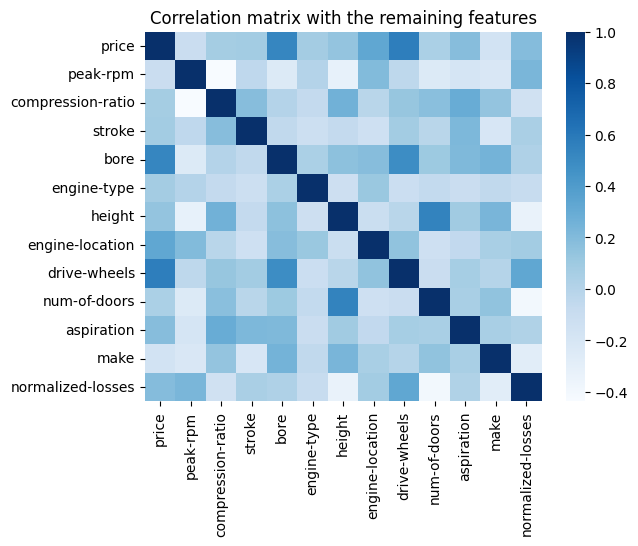

In [119]:
# New correlation matrix
sns.heatmap(X_df.corr(), cmap='Blues')
plt.title('Correlation matrix with the remaining features')
plt.show()

In [120]:
# Recalculating the variances
variances = X_df.var()
variances

price                6.208856e+07
peak-rpm             2.276599e+05
compression-ratio    1.577710e+01
stroke               9.869127e-02
bore                 7.342610e-02
engine-type          1.112530e+00
height               5.970800e+00
engine-location      1.449067e-02
drive-wheels         3.093257e-01
num-of-doors         9.874701e-01
aspiration           1.486370e-01
make                 3.937351e+01
normalized-losses    1.255880e+03
dtype: float64

In [121]:
# Dropping features with low variance
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)
asd = selector.fit_transform(X_df)
selected_columns = X_df.columns[~selector.get_support()]
X_df.drop(columns=selected_columns, inplace=True)
X_df

,price,peak-rpm,compression-ratio,engine-type,height,drive-wheels,num-of-doors,aspiration,make,normalized-losses
0,13495.0,5000.0,9.0,0,48.8,2,2.0,0,0,164.0
1,16500.0,5000.0,9.0,0,48.8,2,2.0,0,0,164.0
2,16500.0,5000.0,9.0,5,52.4,2,2.0,0,0,164.0
3,13950.0,5500.0,10.0,3,54.3,1,4.0,0,1,164.0
4,17450.0,5500.0,8.0,3,54.3,0,4.0,0,1,164.0
...,...,...,...,...,...,...,...,...,...,...
200,16845.0,5400.0,9.5,3,55.5,2,4.0,0,21,95.0
201,19045.0,5300.0,8.7,3,55.5,2,4.0,1,21,95.0
202,21485.0,5500.0,8.8,5,55.5,2,4.0,0,21,95.0
203,22470.0,4800.0,23.0,3,55.5,2,4.0,1,21,95.0


In [122]:
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X_df)
y = y_df.values.squeeze(-1)
X.shape, y.shape

((205, 10), (205,))

In [123]:
# Splitting the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((164, 10), (164,), (41, 10), (41,))

In [124]:
# 3 classifier models
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

logreg = LogisticRegression(random_state=seed)
logreg.fit(X_train, y_train)
y_pred_kn = logreg.predict(X_test)

mlp = MLPClassifier(alpha=0.001, max_iter=10000, random_state=seed)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [125]:
# Evaluation function, calculating precision/recall/f1-score for the test set for all the models
# Plotting the 3 scores for each model
# Plotting the confusion matrix for each model
def plot_model_comparison(models, X_test, y_test):
    metrics = {"Precision": [], "Recall": [], "F1-Score": []}
    cm_list = []

    for _, model in models.items():
        # Getting the prediction for test data
        y_pred = model.predict(X_test)
        # Calculating the metrics
        metrics["Precision"].append(precision_score(y_test, y_pred, average='weighted', zero_division=0.0))
        metrics["Recall"].append(recall_score(y_test, y_pred, average='weighted', zero_division=0.0))
        metrics["F1-Score"].append(f1_score(y_test, y_pred, average='weighted', zero_division=0.0))
        # Calculating the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cm_list.append(cm)
    metrics_df = pd.DataFrame(metrics, index=models.keys())
    print(metrics_df)
    # Plotting the bars for the scores
    x = np.arange(len(metrics))
    width = 0.2
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, model in enumerate(models.keys()):
        ax.bar(
            x + i * width,
            metrics_df.iloc[i, :],
            width,
            label=model
        )
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Scores")
    ax.set_title("Comparison of Precision, Recall, and F1-Score Across Models")
    ax.set_xticks(x + width)
    ax.set_xticklabels(metrics.keys())
    ax.legend()
    plt.tight_layout()
    # Plotting the confusion matrices
    fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
    for i, (model_name, cm) in enumerate(zip(models.keys(), cm_list)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
                    ax=axes[i], annot_kws={"size": 14})
        axes[i].set_title(f'{model_name}')
        axes[i].set_xlabel('Predicted Labels')
        axes[i].set_ylabel('True Labels')
    fig.suptitle('Confusion matrices on test data')
    plt.tight_layout()
    plt.show()


In [126]:
# Model dictionary
models = {
    'Random Forest': rf,
    'Logistic Regression': logreg,
    'MLP': mlp
}

                     Precision    Recall  F1-Score
Random Forest         0.790543  0.756098  0.747460
Logistic Regression   0.395833  0.439024  0.398430
MLP                   0.770732  0.780488  0.769725


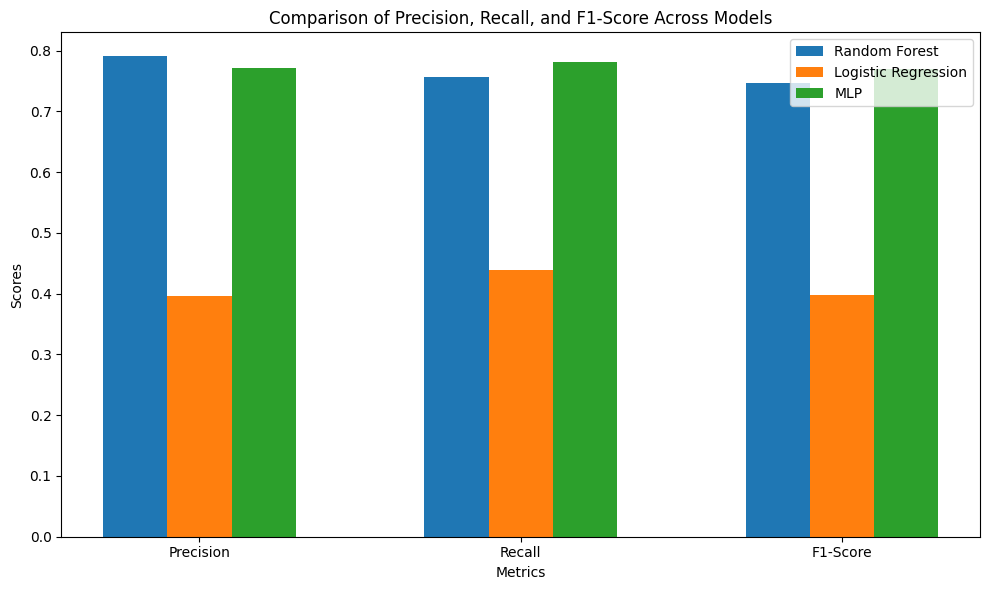

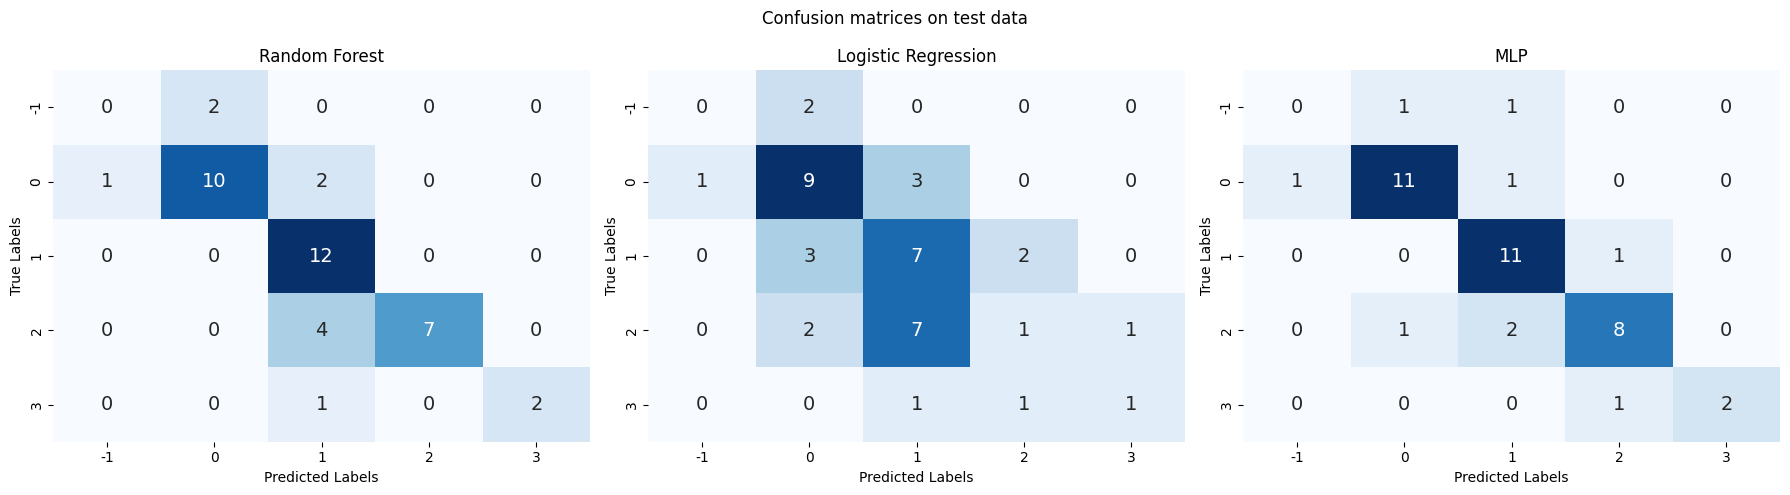

In [127]:
plot_model_comparison(models, X_test, y_test)

In [128]:
# Hyperparameter tuning with Grid Search Cross validation
param_grid_rf = {
    'n_estimators': [20,50,60],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=seed),
    param_grid=param_grid_rf,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)


c:\Users\szige\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 60}


In [129]:
models['Tuned Random Forest'] = grid_search_rf

                     Precision    Recall  F1-Score
Random Forest         0.790543  0.756098  0.747460
Logistic Regression   0.395833  0.439024  0.398430
MLP                   0.770732  0.780488  0.769725
Tuned Random Forest   0.804878  0.780488  0.769648


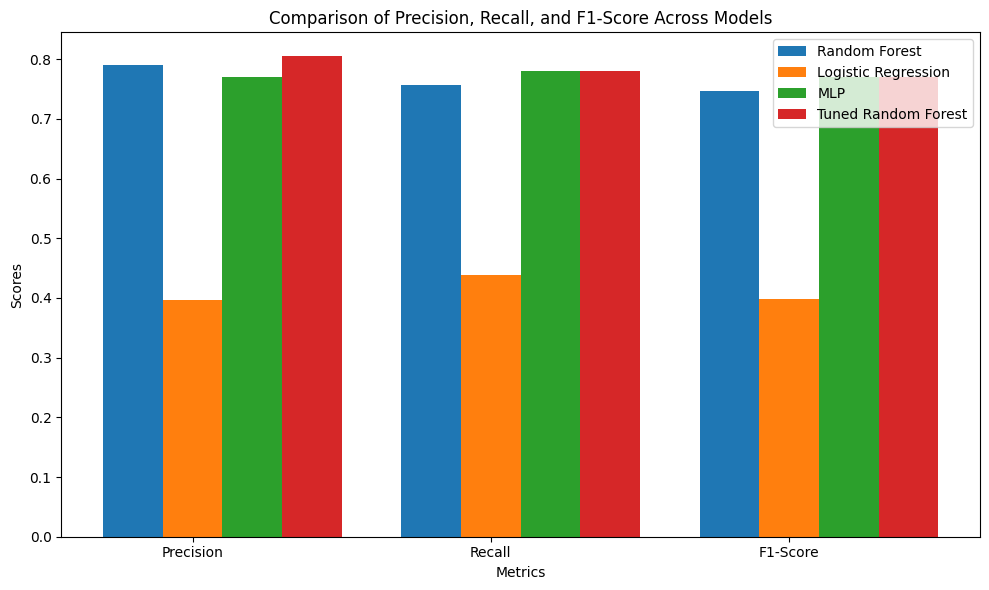

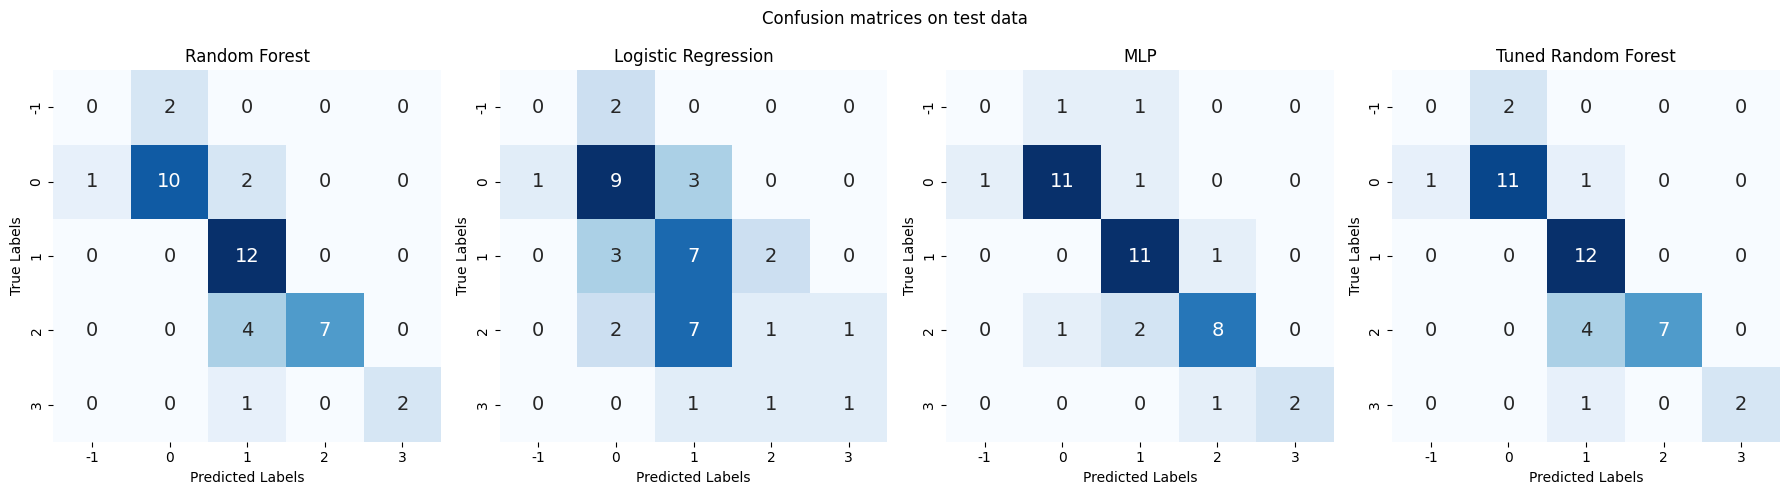

In [130]:
plot_model_comparison(models, X_test, y_test)

### Results Summary

My notebook produced the following main results:

**Data Insights:**
   - Missing values were handled by filling, and features were standardized because they had different ranges.
   - Some features were highly correlated or had very low variance, so they were removed to improve the models' performance.

**Model Performance:**
   - **Random Forest:** A good all-around performer with balanced results.
   - **Logistic Regression:** Worked okay but didn’t handle the dataset’s complexity as well as the others.
   - **MLP:** Delivered strong results, handling the data complexity well.
   - Precision, Recall, and F1-score varied across models, showing different strengths.

**Hyperparameter Tuning:**
   - Optimizing the Random Forest improved its performance.
   - The best parameters were:
     - `n_estimators`: 60
     - `max_depth`: 10
     - `min_samples_split`: 5

**Evaluation Insights:**
   - Confusion matrices showed how each model made predictions, including misclassifications.
   - Comparing the metrics, the MLP and tuned Random Forest performed the best.

---

### Final Takeaway

The tuned Random Forest and MLP were the best models overall, handling the data well and achieving the highest scores. These models would be a good choice for further testing or deployment with this dataset.
